In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Clustering/C02_epl_players.csv')
data.head()

,Name,Appearances,Goals,Wins,Losses,Goals per match
0,Emmanuel Longelo,0,0,0,0,0.00
1,Ayoze Pérez,203,43,69,88,0.21
2,Sadio Mané,236,99,142,42,0.42
3,Raúl Jiménez,93,35,39,29,0.38
4,Dwight Gayle,139,26,32,74,0.19


In [4]:
data = data.drop(['Name', 'Goals','Losses','Goals per match'], axis=1)
data.head()

,Appearances,Wins
0,0,0
1,203,69
2,236,142
3,93,39
4,139,32


Text(0.5, 0, 'Appearances')

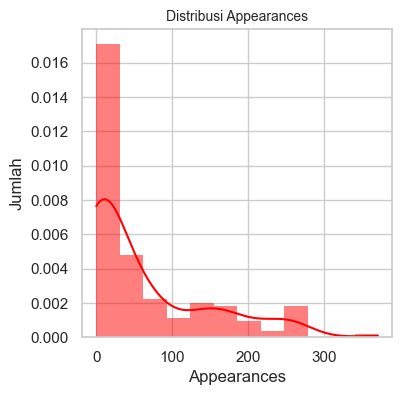

In [5]:
plt.figure(figsize=(4,4))
sns.set(style= 'whitegrid')
sns.histplot(data['Appearances'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi Appearances', fontsize=10)
plt.ylabel('Jumlah')
plt.xlabel('Appearances')

Text(0.5, 0, 'Wins')

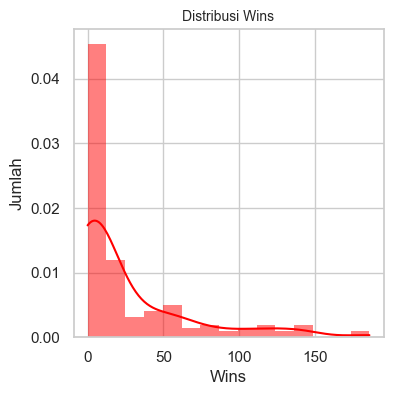

In [6]:
plt.figure(figsize=(4,4))
sns.set(style= 'whitegrid')
sns.histplot(data['Wins'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi Wins', fontsize=10)
plt.ylabel('Jumlah')
plt.xlabel('Wins')

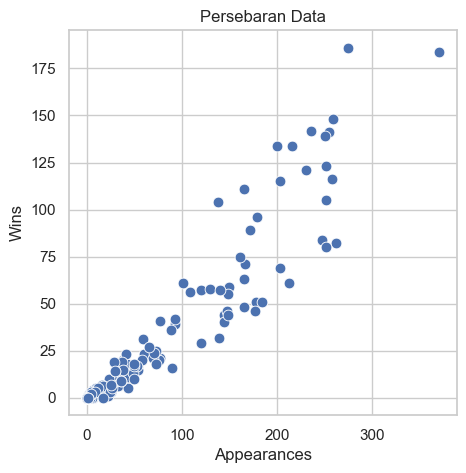

In [7]:
# Persebaran Data
plt.figure(figsize=(5,5))
sns.scatterplot(x='Appearances', y='Wins', data = data, s = 60)
plt.title('Persebaran Data')
plt.show()

In [8]:
# hitung within cluster sum of squared error (WCSS) untuk tiap kluster yang berbeda
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 11):
    kmModel = KMeans(n_clusters=i, n_init=10)
    kmModel.fit(data)
    wcss.append(kmModel.inertia_)

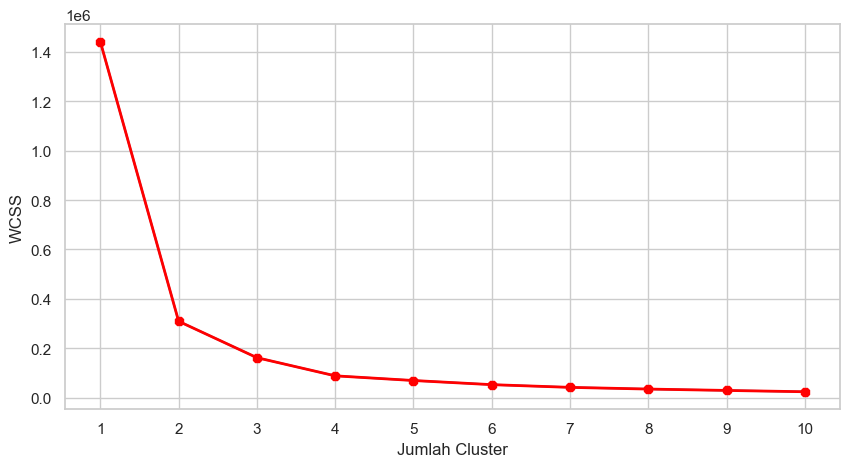

In [9]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [10]:
# model dengan 2 cluster
kmModelFix = KMeans(n_clusters=2, n_init=10)
kmModelFix.fit(data)

# memprediksi label
hasil_prediksi = kmModelFix.predict(data)
print(hasil_prediksi)

[1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1]


In [11]:
data['label'] = hasil_prediksi
data.head()

,Appearances,Wins,label
0,0,0,1
1,203,69,0
2,236,142,0
3,93,39,1
4,139,32,0


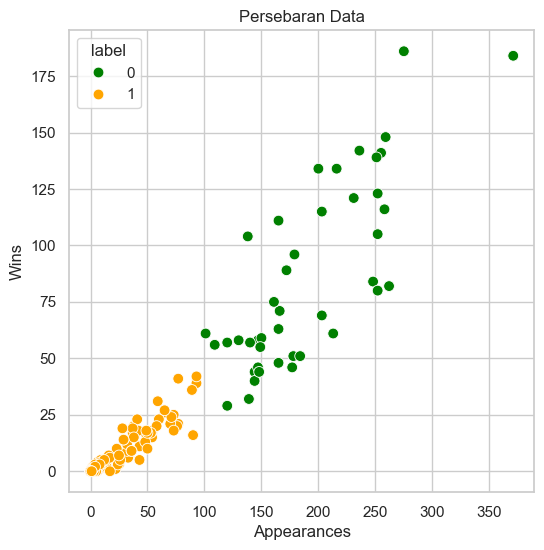

In [12]:
# Persebaran Data beserta labelnya
plt.figure(figsize=(6,6))
sns.scatterplot(x='Appearances', y='Wins', hue='label',
                palette=['green', 'orange'], legend='full',
                data = data, s = 60)
plt.title('Persebaran Data')
plt.show()